In [13]:
import clip
import glob
from PIL import Image
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import os
import IPython.display as display
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
#my batch of images
path = './frames'
images = [f for f in os.listdir('./frames') if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
#what I am searching
text = clip.tokenize(["grass"]).to(device)
#create an array of preprocessed images
imgs = [preprocess(Image.open(f"{path}/{img}")) for img in images]
with torch.no_grad():
  #prediction with one prompt, several images. We need to stack the images together
 logits_per_image, logits_per_text = model(torch.stack(imgs).to(device),text)
 probs = logits_per_text.softmax(dim=-1).cpu().numpy()
print("Label probs:", probs)

Label probs: [[5.9437780e-06 2.6722539e-05 3.3837845e-05 6.9522845e-05 8.6372715e-01
  3.0467265e-05 3.1377131e-05 3.5001371e-02 3.4087891e-05 2.8929026e-05
  9.3104227e-06 6.1924125e-05 1.3000642e-05 4.0517836e-05 1.3173833e-04
  9.4619490e-06 1.7327115e-04 3.4908113e-05 1.3406186e-02 6.2512860e-05
  5.0892268e-04 3.0349353e-05 2.0527254e-05 1.1861097e-03 2.0369733e-04
  1.8011939e-02 5.4516051e-05 1.7054840e-04 5.7863486e-05 9.7089032e-05
  2.1215135e-04 1.4417605e-04 6.3224477e-03 1.4873056e-04 2.9132198e-04
  1.2025745e-04 4.1324231e-05 4.2608604e-05 5.1642314e-02 1.4144847e-03
  5.1590870e-04 2.1437216e-05 5.0423627e-05 3.8430630e-06 1.1363400e-04
  8.8571032e-05 8.9798968e-06 3.1854721e-05 7.5172553e-05 4.4284927e-04
  7.9045107e-04 1.3018422e-03 7.6026504e-04 1.9644047e-04 4.4998680e-05
  1.5751511e-03 1.0584215e-05 3.1384811e-04]]


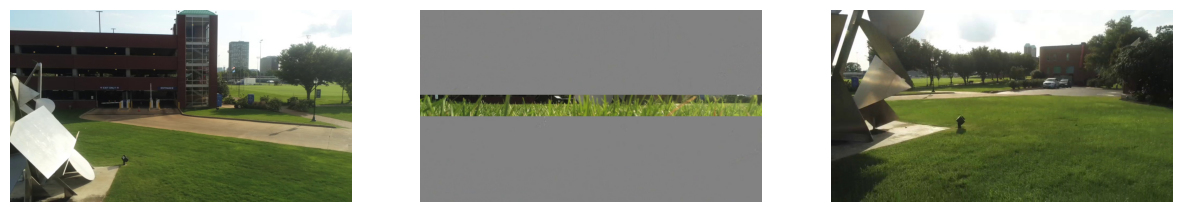

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
dataset_folder = './frames'
#Load all the images into an array
images = []
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        if file.endswith('jpg'):
            images.append(  root  + '/'+ file)
text = clip.tokenize(['car']).to(device)
text_features = model.encode_text(text)
result = {}
cos = torch.nn.CosineSimilarity(dim=0)
#For each image, compute its cosine similarity with the prompt and store the result in a dict
for img in images:
    with torch.no_grad():
        image_preprocess = preprocess(Image.open(img)).unsqueeze(0).to(device)
        image_features = model.encode_image( image_preprocess)
        sim = cos(image_features[0],text_features[0]).item()
        sim = (sim+1)/2
        result[img]=sim
        
#Sort the dict and retrieve the first 3 values
sorted_value = sorted(result.items(), key=lambda x:x[1], reverse=True)
sorted_res = dict(sorted_value)
top = dict(itertools.islice(sorted_res.items(), 3))

num_images = len(top)
    
# Set up the subplot grid
fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    
# Iterate through image paths and plot each image
for i, path in enumerate(top):
    img = mpimg.imread(path)
    axs[i].imshow(img)
    axs[i].axis('off')  # Turn off axis labels for better visualization
    
plt.show()